In [211]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import time
from sklearn import metrics

In [165]:
TRAIN_DIR = 'Data/Cats vs Dogs/train/'
TEST_DIR = 'Data/Cats vs Dogs/test/'

train_images_filepaths = [TRAIN_DIR + last_file_name for last_file_name in os.listdir(TRAIN_DIR)]
test_images_filepaths = [TEST_DIR + last_file_name for last_file_name in os.listdir(TEST_DIR)]

print("Done")
train_dogs_filepaths = [TRAIN_DIR+ dog_file_name for dog_file_name in os.listdir(TRAIN_DIR) if 'dog' in dog_file_name]
train_cats_filepaths = [TRAIN_DIR+ cat_file_name for cat_file_name in os.listdir(TRAIN_DIR) if 'cat' in cat_file_name]
print("Done")

Done
Done


In [166]:
train_images_filepaths

['Data/Cats vs Dogs/train/cat.0.jpg',
 'Data/Cats vs Dogs/train/cat.1.jpg',
 'Data/Cats vs Dogs/train/cat.10.jpg',
 'Data/Cats vs Dogs/train/cat.100.jpg',
 'Data/Cats vs Dogs/train/cat.1000.jpg',
 'Data/Cats vs Dogs/train/cat.10000.jpg',
 'Data/Cats vs Dogs/train/cat.10001.jpg',
 'Data/Cats vs Dogs/train/cat.10002.jpg',
 'Data/Cats vs Dogs/train/cat.10003.jpg',
 'Data/Cats vs Dogs/train/cat.10004.jpg',
 'Data/Cats vs Dogs/train/cat.10005.jpg',
 'Data/Cats vs Dogs/train/cat.10006.jpg',
 'Data/Cats vs Dogs/train/cat.10007.jpg',
 'Data/Cats vs Dogs/train/cat.10008.jpg',
 'Data/Cats vs Dogs/train/cat.10009.jpg',
 'Data/Cats vs Dogs/train/cat.1001.jpg',
 'Data/Cats vs Dogs/train/cat.10010.jpg',
 'Data/Cats vs Dogs/train/cat.10011.jpg',
 'Data/Cats vs Dogs/train/cat.10012.jpg',
 'Data/Cats vs Dogs/train/cat.10013.jpg',
 'Data/Cats vs Dogs/train/cat.10014.jpg',
 'Data/Cats vs Dogs/train/cat.10015.jpg',
 'Data/Cats vs Dogs/train/cat.10016.jpg',
 'Data/Cats vs Dogs/train/cat.10017.jpg',
 'Data/

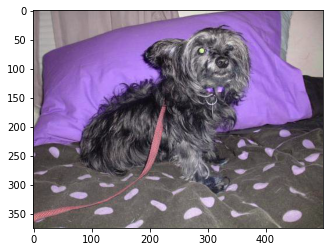

In [167]:
#Seeing a "color" image
test_img_file_path = train_dogs_filepaths[0]
img_array = cv2.imread(test_img_file_path,cv2.IMREAD_COLOR) #The last parameter can be switched with cv2.IMREAD_GRAYSCALE too
plt.imshow(img_array)
plt.show()

In [168]:
#print(img_array)

In [169]:
print(img_array.shape)

(375, 499, 3)


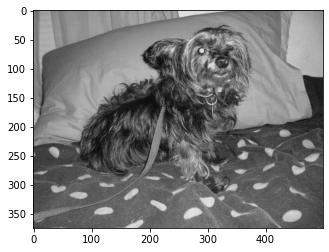

(375, 499)
[[115 118 119 ... 132 132 132]
 [116 118 119 ... 134 134 134]
 [117 119 120 ... 136 136 136]
 ...
 [ 72  76  78 ...  80  79  78]
 [ 70  72  72 ...  72  72  73]
 [ 69  70  69 ...  71  71  71]]


array([115, 118, 119, ...,  71,  71,  71], dtype=uint8)

In [170]:
img_array_gray = cv2.imread(test_img_file_path,cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array_gray, cmap = "gray")
plt.show()

print(img_array_gray.shape)
print(img_array_gray)# !!!!!!!!!!!!!!!!!!
img_array_gray.ravel()

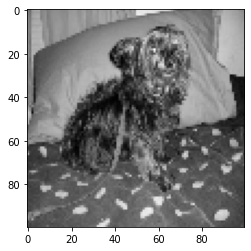

In [171]:
ROW_DIMENSION = 100
COLUMN_DIMENSION = 100
CHANNELS = 1 #For greyscale images put it to 1; put it to 3 if you want color image data

new_array = cv2.resize(img_array_gray,(ROW_DIMENSION,COLUMN_DIMENSION)) #A squarish compression on it's width will take place
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [172]:
list = []
for i in range(100*100):
    list.append(i)
dfDogs = pd.DataFrame(columns=list)
dfCats = pd.DataFrame(columns=list)

In [173]:
dfDogs

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999


In [174]:
def toDF (df, name):
    ROW_DIMENSION = 100
    COLUMN_DIMENSION = 100
    for i in range (0, len(train_dogs_filepaths)):
        test_img_file_path = train_dogs_filepaths[i]
        img_array_gray = cv2.imread(test_img_file_path, cv2.IMREAD_GRAYSCALE)
        img_array_gray = cv2.resize(img_array_gray,(ROW_DIMENSION,COLUMN_DIMENSION))
        img_array_gray = img_array_gray.ravel()
        df.loc[i] = img_array_gray
    if (name == 'cat'):
        df['Dog/Cat'] = 0
    if (name == 'dog'):
        df['Dog/Cat'] = 1
    return df

In [175]:
dfDogs = toDF (dfDogs, 'dog')
dfCats = toDF (dfCats, 'cat')

In [180]:
dfDogs

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Dog/Cat
0,119,109,152,160,160,165,130,134,136,124,...,80,76,77,74,70,70,69,88,75,1
1,146,120,124,132,101,105,53,96,112,78,...,250,255,248,246,243,242,240,239,237,1
2,118,109,93,98,101,123,125,116,120,126,...,95,95,96,93,93,94,92,94,94,1
3,185,184,186,183,183,181,182,183,184,185,...,58,78,84,80,59,65,59,69,71,1
4,16,7,7,7,23,52,63,45,77,40,...,103,107,114,109,126,124,123,116,116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,1
12496,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,1
12497,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,1
12498,254,251,245,234,224,207,189,144,112,75,...,102,107,114,111,111,107,116,114,121,1


In [183]:
df = pd.concat([dfDogs, dfCats])
df.index.name = 'i' #renaming the index column so that the new index will not have the same name as the old
df = df.reset_index()
df = df.drop(['i'], axis = 1)

In [188]:
df.isna().sum().sum()

0

In [184]:
df

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Dog/Cat
0,119,109,152,160,160,165,130,134,136,124,...,80,76,77,74,70,70,69,88,75,1
1,146,120,124,132,101,105,53,96,112,78,...,250,255,248,246,243,242,240,239,237,1
2,118,109,93,98,101,123,125,116,120,126,...,95,95,96,93,93,94,92,94,94,1
3,185,184,186,183,183,181,182,183,184,185,...,58,78,84,80,59,65,59,69,71,1
4,16,7,7,7,23,52,63,45,77,40,...,103,107,114,109,126,124,123,116,116,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,140,143,142,145,146,147,148,149,148,149,...,165,166,166,167,168,168,168,168,169,0
24996,117,78,102,83,101,113,69,85,86,86,...,97,77,100,84,77,85,93,94,74,0
24997,42,35,47,58,65,46,51,57,58,40,...,133,130,125,70,113,182,127,113,167,0
24998,254,251,245,234,224,207,189,144,112,75,...,102,107,114,111,111,107,116,114,121,0


In [193]:
x = df.drop(['Dog/Cat'], axis = 1)
y = df['Dog/Cat']

In [196]:
z = x.values #returns a numpy array
min_max_scaler = MinMaxScaler()
z_scaled = min_max_scaler.fit_transform(z)
x = pd.DataFrame(z_scaled)
x

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.466667,0.427451,0.596078,0.627451,0.627451,0.647059,0.509804,0.525490,0.533333,0.486275,...,0.290196,0.313725,0.298039,0.301961,0.290196,0.274510,0.274510,0.270588,0.345098,0.294118
1,0.572549,0.470588,0.486275,0.517647,0.396078,0.411765,0.207843,0.376471,0.439216,0.305882,...,0.976471,0.980392,1.000000,0.972549,0.964706,0.952941,0.949020,0.941176,0.937255,0.929412
2,0.462745,0.427451,0.364706,0.384314,0.396078,0.482353,0.490196,0.454902,0.470588,0.494118,...,0.286275,0.372549,0.372549,0.376471,0.364706,0.364706,0.368627,0.360784,0.368627,0.368627
3,0.725490,0.721569,0.729412,0.717647,0.717647,0.709804,0.713725,0.717647,0.721569,0.725490,...,0.274510,0.227451,0.305882,0.329412,0.313725,0.231373,0.254902,0.231373,0.270588,0.278431
4,0.062745,0.027451,0.027451,0.027451,0.090196,0.203922,0.247059,0.176471,0.301961,0.156863,...,0.419608,0.403922,0.419608,0.447059,0.427451,0.494118,0.486275,0.482353,0.454902,0.454902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.549020,0.560784,0.556863,0.568627,0.572549,0.576471,0.580392,0.584314,0.580392,0.584314,...,0.643137,0.647059,0.650980,0.650980,0.654902,0.658824,0.658824,0.658824,0.658824,0.662745
24996,0.458824,0.305882,0.400000,0.325490,0.396078,0.443137,0.270588,0.333333,0.337255,0.337255,...,0.376471,0.380392,0.301961,0.392157,0.329412,0.301961,0.333333,0.364706,0.368627,0.290196
24997,0.164706,0.137255,0.184314,0.227451,0.254902,0.180392,0.200000,0.223529,0.227451,0.156863,...,0.396078,0.521569,0.509804,0.490196,0.274510,0.443137,0.713725,0.498039,0.443137,0.654902
24998,0.996078,0.984314,0.960784,0.917647,0.878431,0.811765,0.741176,0.564706,0.439216,0.294118,...,0.462745,0.400000,0.419608,0.447059,0.435294,0.435294,0.419608,0.454902,0.447059,0.474510


In [197]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [200]:
pca = PCA(n_components=0.9)
X_train_Reduced = pca.fit_transform(X_train)
X_test_Reduced = pca.transform(X_test)

In [206]:
X_train_Reduced = pd.DataFrame(X_train_Reduced)
X_test_Reduced = pd.DataFrame(X_test_Reduced)

In [223]:
start_timeXGBoost = time.time()
#warnings.filterwarnings('ignore')
modelXGBoost = XGBClassifier(learning_rate = 1, n_estimators = 50, verbosity = 0, use_label_encoder = False, n_jobs = -1)
modelXGBoost.fit(X_train, y_train)
predictionsXGBoost = modelXGBoost.predict(X_test)
accuracyXGBoost = metrics.accuracy_score(y_test, predictionsXGBoost)
print("Accuracy (XGBoost): ", accuracyXGBoost)
timeXGBoost = time.time() - start_timeXGBoost
print("Time taken to achive result: %s seconds" % (timeXGBoost))

Accuracy (XGBoost):  0.0496
Time taken to achive result: 64.00690126419067 seconds


C:\Users\appel\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [224]:
predictionsXGBoost = np.where(predictionsXGBoost == 1, 0, 1)

In [225]:
accuracyXGBoost = metrics.accuracy_score(y_test, predictionsXGBoost)
accuracyXGBoost

0.9504